In [2]:
import requests
import pandas as pd
from sklearn.compose import ColumnTransformer
from sklearn.impute import SimpleImputer
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.metrics import classification_report
from sklearn.pipeline import make_pipeline

import numpy as np

Maginificent 7: AAPL, MSFT, GOOG, AMZN, NVDA, TSLA, META

Bottom 20 (In order 481 -> 500): ETSY, RHI, CHRW, FRT, NCLH, PNW, MKTX, FMC, MHK, PARA, BWA, IVZ, HAS, GNRC, CMA, XRAY, ZION, VFC, WHR, DOC

In [39]:
from polygon import RESTClient

API_KEY = 'haipvekU3JCTJm4fLqk8CHdTsIju3xTD'

client = RESTClient(API_KEY)

company = "MSFT"

aggs = []
for a in client.list_aggs(
    company,
    1,
    "minute",
    "2023-09-01",
    "2024-02-01",
    limit=100000,
):
    agg_dict = a.__dict__
    aggs.append(agg_dict)

df = pd.DataFrame(aggs)

df['timestamp'] = pd.to_datetime(df['timestamp'], unit='ms')
df = df.set_index('timestamp')
df['returns'] = (df['close'] / df['open'] - 1) * 100

#df.to_csv(f'{company}_Data.csv')

df

,open,high,low,close,volume,vwap,transactions,otc,returns
timestamp,,,,,,,,,
2023-09-01 08:05:00,328.43,328.4800,328.43,328.48,1418.0,328.4673,25,None,0.015224
2023-09-01 08:16:00,328.67,328.6700,328.54,328.54,330.0,328.5912,8,None,-0.039553
2023-09-01 08:20:00,328.50,328.5000,328.48,328.48,610.0,328.4858,14,None,-0.006088
2023-09-01 08:23:00,328.48,328.4800,328.48,328.48,504.0,328.4808,7,None,0.000000
2023-09-01 08:34:00,328.41,328.4100,328.41,328.41,161.0,328.4138,2,None,0.000000
...,...,...,...,...,...,...,...,...,...
2024-02-02 00:53:00,406.75,406.7500,406.75,406.75,606.0,406.9178,26,None,0.000000
2024-02-02 00:55:00,406.78,406.9899,406.75,406.79,1703.0,406.8259,34,None,0.002458
2024-02-02 00:56:00,406.77,406.7800,406.77,406.78,809.0,406.7380,30,None,0.002458


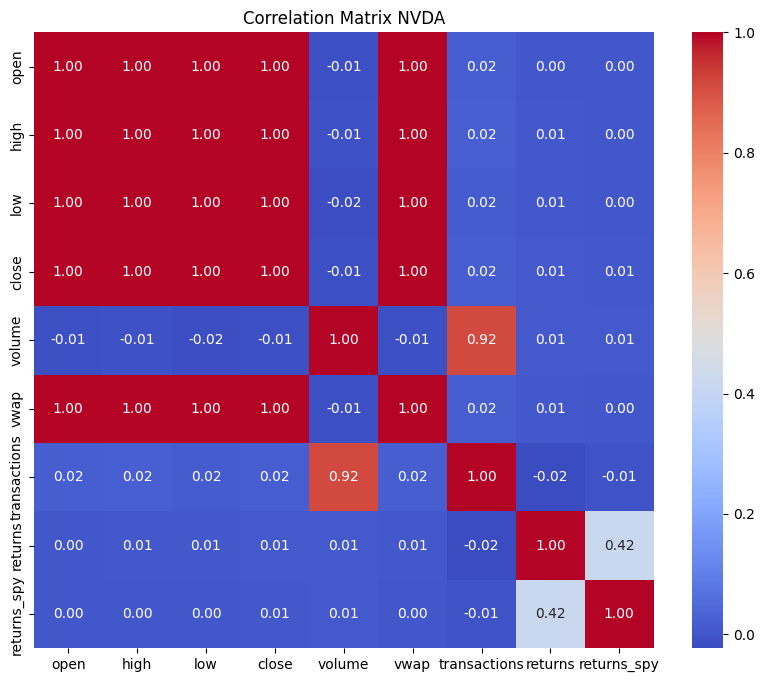

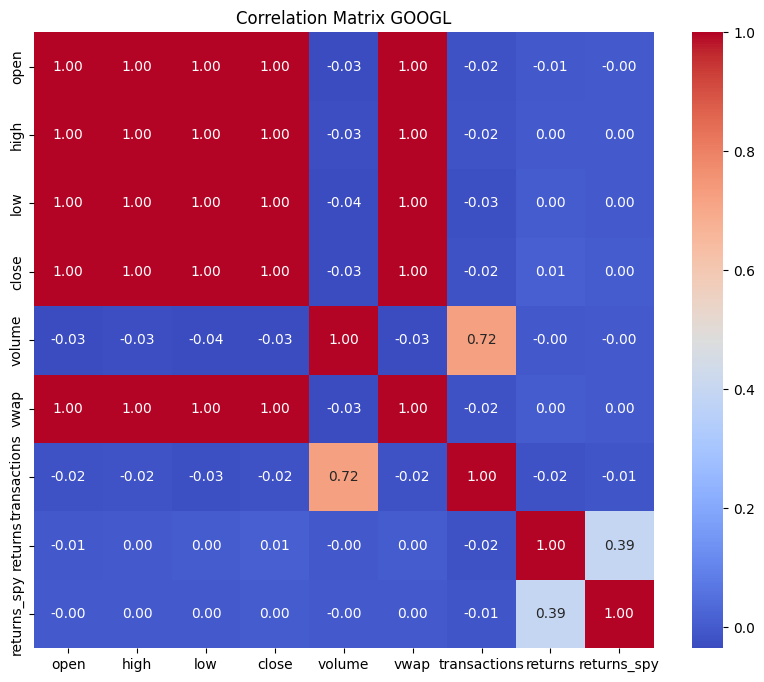

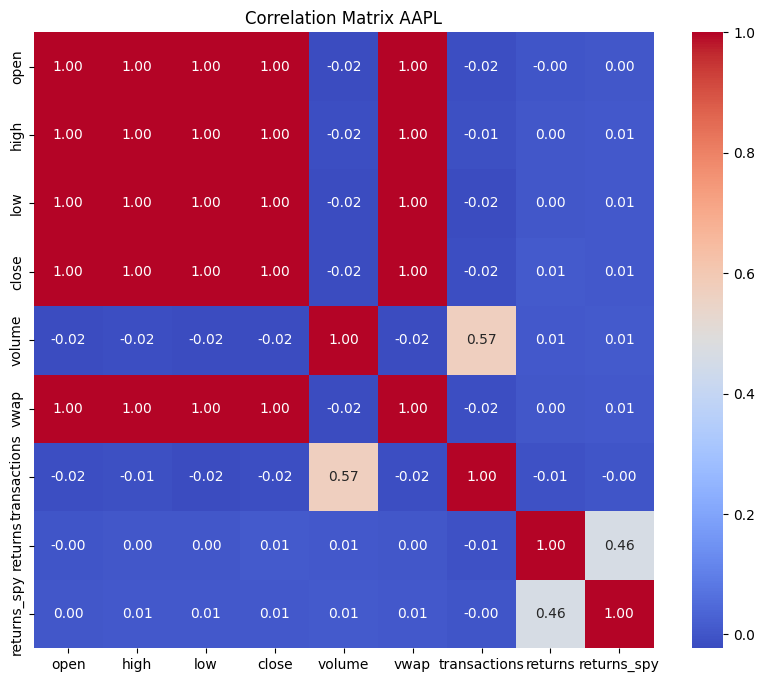

In [4]:
import seaborn as sns
import matplotlib.pyplot as plt

nvda_with_spy_returns = nvda.join(spy['returns'], rsuffix='_spy')
googl_with_spy_returns = googl.join(spy['returns'], rsuffix='_spy')
aapl_with_spy_returns = aapl.join(spy['returns'], rsuffix='_spy')

correlation_matrix_nvda = nvda_with_spy_returns.corr()
correlation_matrix_googl = googl_with_spy_returns.corr()
correlation_matrix_aapl = aapl_with_spy_returns.corr()


plt.figure(figsize=(10, 8))  # Adjust the figure size as needed
sns.heatmap(correlation_matrix_nvda, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Matrix NVDA')
plt.show()

plt.figure(figsize=(10, 8))  # Adjust the figure size as needed
sns.heatmap(correlation_matrix_googl, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Matrix GOOGL')
plt.show()

plt.figure(figsize=(10, 8))  # Adjust the figure size as needed
sns.heatmap(correlation_matrix_aapl, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Matrix AAPL')
plt.show()

In [ ]:
table = pd.read_html('https://en.wikipedia.org/wiki/List_of_S%26P_500_companies')
df = table[0]
symbols = df['Symbol'].tolist()

import yfinance as yf

# Fetch data
data = yf.download(symbols, period="1d")  # This fetches data for all symbols, might take time

# Get market cap using info method (for individual tickers)
market_caps = {}
for symbol in symbols:
    ticker = yf.Ticker(symbol)
    try:
        market_caps[symbol] = ticker.info['marketCap']
    except:
        market_caps[symbol] = None

market_caps_df = pd.DataFrame(list(market_caps.items()), columns=['Symbol', 'MarketCap'])

# Drop rows with None values if any
market_caps_df.dropna(inplace=True)

# Sort by MarketCap
market_caps_df.sort_values(by='MarketCap', ascending=False, inplace=True)

# Select top 10 and bottom 10
top_10 = market_caps_df.head(10)
bottom_20 = market_caps_df.tail(20)

print("Top 10 S&P 500 Companies by Market Cap:")
print(top_10)

print("\nBottom 20 S&P 500 Companies by Market Cap:")
print(bottom_20)

# Test Attempt

Maginificent 7: AAPL, MSFT, GOOG, AMZN, NVDA, TSLA, META

Bottom 20 (In order 481 -> 500): ETSY, RHI, CHRW, FRT, NCLH, PNW, MKTX, FMC, MHK, PARA, BWA, IVZ, HAS, GNRC, CMA, XRAY, ZION, VFC, WHR, DOC

In [100]:
tickers = ['AAPL', 'MSFT', 'GOOG', 'AMZN', 'NVDA', 'TSLA', 'META', 'SPY', 'ETSY']
mag_7_tickers = ['AAPL', 'MSFT', 'GOOG', 'AMZN', 'NVDA', 'TSLA', 'META']

spy = pd.read_csv('Data/SPY_data.csv')
etsy = pd.read_csv('Data/Bottom_20/ETSY_data.csv')

mag_7 = []
spy_list = []  # Renamed to avoid confusion
bot_20 = []

for ticker in tickers:
    ends = '_df'

    if ticker in mag_7_tickers:
        df_file_path = f'Data/Mag_7/{ticker}_data.csv'
    elif ticker == 'SPY':
        df_file_path = f'Data/{ticker}_data.csv'
    else:
        df_file_path = f'Data/Bottom_20/{ticker}_data.csv'

    df = pd.read_csv(df_file_path).drop(['vwap', 'otc'], axis=1)
    df['timestamp'] = pd.to_datetime(df['timestamp'])
    df.set_index('timestamp', inplace=True)

    original_dates = np.unique(df.index.date)

    # Ensure DataFrame includes all days by reindexing
    full_date_range = pd.date_range(start=df.index.min(), end=df.index.max(), freq='T')
    df = df.reindex(full_date_range, method='ffill').asfreq('T')  # 'ffill' to forward fill missing values, adjust as needed

    resampled_df = df.resample('15T').agg({
        'open': 'first',
        'high': 'max',
        'low': 'min',
        'close': 'last',
        'volume': 'sum',
        'transactions': 'sum',
        # For returns, calculation might need to be revised based on reindexing and filling logic
    })

    # Adjust 'returns' calculation if necessary based on your filling strategy
    resampled_df['returns'] = (resampled_df['close'] / resampled_df['open'] - 1) * 100
    resampled_df = resampled_df[pd.Series(resampled_df.index.date, index=resampled_df.index).isin(original_dates)]
    resampled_df = resampled_df.between_time('08:00', '16:00')


    df_var_name = ticker + ends
    globals()[df_var_name] = resampled_df
    if ticker in mag_7_tickers:
        mag_7.append(globals()[df_var_name])
    elif ticker == 'SPY':
        spy_list.append(globals()[df_var_name])  # Use the correctly named list
    else:
        bot_20.append(globals()[df_var_name])

spy_list[0].head(40)

,open,high,low,close,volume,transactions,returns
2023-09-01 08:00:00,451.530,451.6100,451.12,451.4400,20785.0,147,-0.019932
2023-09-01 08:15:00,451.440,451.4500,451.32,451.4500,9777.0,132,0.002215
2023-09-01 08:30:00,451.450,451.4500,451.35,451.4000,6948.0,102,-0.011075
2023-09-01 08:45:00,451.480,451.5700,451.37,451.3700,7226.0,43,-0.024364
2023-09-01 09:00:00,451.370,451.8200,451.37,451.7700,14503.0,125,0.088619
2023-09-01 09:15:00,451.860,451.9500,451.85,451.9500,17737.0,121,0.019918
2023-09-01 09:30:00,451.940,451.9500,451.74,451.8000,4396.0,66,-0.030978
2023-09-01 09:45:00,451.830,451.8500,451.69,451.7100,15855.0,125,-0.026559
2023-09-01 10:00:00,451.710,451.9900,451.49,451.9800,12356.0,121,0.059773
2023-09-01 10:15:00,451.980,452.0300,451.88,451.9400,11108.0,97,-0.008850


In [101]:
def fill_na_custom(row, prev_close, next_open, daily_avg_volume, daily_avg_transactions):
    if pd.isna(row['open']):
        row['open'] = prev_close
        row['close'] = next_open
        row['high'] = max(prev_close, next_open)
        row['low'] = min(prev_close, next_open)
        print(row.name.date())
        row['volume'] = daily_avg_volume[row.name.date()]
        row['transactions'] = daily_avg_transactions[row.name.date()]
        row['returns'] = (row['close'] / row['open'] - 1) * 100
    return row

val = 0

for df in mag_7:
    daily_avg_volume = df.resample('D')['volume'].mean()
    daily_avg_transactions = df.resample('D')['transactions'].mean()

    for i in range(1, len(df) - 1):
        if pd.isna(df.iloc[i]['open']):
            prev_close = df.iloc[i-1]['close']
            next_open = df.iloc[i+1]['open']
            print(i)
            df.iloc[i] = fill_na_custom(df.iloc[i], prev_close, next_open, daily_avg_volume, daily_avg_transactions)
    val += 1
    print(val)

mag_7

1
2
3
4
5
6
7


[                       open    high     low     close     volume  \
 2023-09-01 08:00:00  188.32  188.32  188.15  188.2800     7655.0   
 2023-09-01 08:15:00  188.27  188.28  188.23  188.2300    14586.0   
 2023-09-01 08:30:00  188.23  188.25  188.23  188.2500    15965.0   
 2023-09-01 08:45:00  188.24  188.28  188.23  188.2300     8903.0   
 2023-09-01 09:00:00  188.23  188.44  188.23  188.4300    10923.0   
 ...                     ...     ...     ...       ...        ...   
 2024-02-01 15:00:00  185.46  185.99  184.90  185.7420  2039948.0   
 2024-02-01 15:15:00  185.74  186.18  185.57  186.1050  1975195.0   
 2024-02-01 15:30:00  186.12  186.30  185.93  186.0650  1627549.0   
 2024-02-01 15:45:00  186.07  186.31  185.35  185.3706  1655675.0   
 2024-02-01 16:00:00  185.37  186.07  185.29  185.8200  1338452.0   
 
                      transactions   returns  
 2023-09-01 08:00:00           189 -0.021240  
 2023-09-01 08:15:00           366 -0.021246  
 2023-09-01 08:30:00         